**Inclass: Understanding Customer Behavior and Boost Retention using Cohort Analysis**

- Implementing Cohort and Conjoint Analysis for Understanding Customer Behaviour Data
- Course Length: 9 Hours
- Created by : Rany Dwi Cahyaningtyas, Hamam Wulan Ayu, & Muhammad Dzaky

---

Developed by Algoritma's product division and instructors team

**Table of Contents**

1. [Background](#0)
2. [Training Objectives](#1)
3. [Cohort Analysis](#2)
4. [Case Study: A Cohort Analysis of Video Learning Platform Subscribers](#3)
5. [Conjoint Analysis](#4)

# Background <a id="0" ></a>

Customer Analytics in Python is where marketing and data science meet. These are two of the key driving forces that help companies create value and stay on top in today’s fast-paced economy. In addition, this course is packed with knowledge and includes sections on customer and purchase analytics, as well as a cohort and conjoint, all implemented in Python.

This course will teach you how to gain authentic insights from the customer's data, as well as how to leverage the power of machine and Exploratory Data to perform customer analytics. 

# Training Objectives <a id="1" ></a>

Introduction to Cohort Analysis
* Definitions and key concepts of cohort analysis
* Benefits and applications of cohort analysis 
* Case studies of using cohort analysis
 
Data Pre-Processing and Visualization
* Loading and processing customer behaviour data
* Visualizing the results of cohort analysis

Introduction to Conjoint Analysis
* Definitions and key concepts of conjoint analysis
* Types of conjoint analysis (e.g., choice-based conjoint, rank-based conjoint)
* Benefits and applications of conjoint analysis

Case Study: Analyzing Customer Preferences with Conjoint Analysis
* Analyze real customer preference data to identify customer preferences and trade-offs
* Gain insights into customer preferences to develop effective new products and services
* Evaluating model performance and interpreting results.


# Cohort Analysis <a id="2" ></a>

## What is Cohort Analysis?

Customer sign-up times vary, making it tricky to directly compare their loyalty. Consider this: only 10% of customers who joined a year ago are still active, while a whopping 90% of last month's customers remain. This doesn't mean recent customers are superior! They've simply had less opportunity to demonstrate their long-term value.

To account for this, we can categorize customers into cohorts based on their signup date. Analyzing these cohorts' retention rates allows for a fairer comparison. Retention data is often visualized using a retention matrix, similar to a grid. Each square in the matrix represents the percentage of a specific cohort who stayed engaged (e.g., made repeat purchases or renewed subscriptions) in the following month. For clarity, the squares are color-coded, as shown below

![assets/cohortmatrix.jpg](https://miro.medium.com/v2/resize:fit:828/format:webp/1*BBhtnuGcpuPhR2idFIK0HQ.png)


There are 2 axes: **time joined**, or the acquisition month (y-axis), and subsequent periods, or **tenure** (x-axis, weeks, months, years, whatever makes sense for the business)

## Benefits and Application of Cohort Analysis

- E-commerce: Analyze purchase frequency, average order value, and churn rates for different customer acquisition cohorts.
- Subscription Services: Track subscriber engagement (e.g., content consumption) and churn rates across signup cohorts.
- Mobile Apps: Analyze app usage patterns (e.g., login frequency, feature usage) for different install cohorts.
- Online Learning Platforms: Understand course completion rates and dropout rates for various student enrollment cohorts.
- Software as a Service (SaaS): Track user activation, feature adoption, and churn rates based on subscription start date cohorts.
- Marketing Campaigns: Evaluate the effectiveness of marketing campaigns by analyzing user acquisition and retention for cohorts exposed to the campaign.

## Weighted Cohort Lifetime

Now, imagine we’re looking at one cohort only, and it has 12 people in it. Let’s use one month as a base period to measure retention on. We’ll say Tenure = 1 when we mean that this has been 1 month since the customer has joined. For simplicity, we’ll also assume that we’re running a subscription-based service, and churned customers have churned for good. 

* **Tenure (maturity) = 1**

    The period we acquire them, let’s consider it as period 1, retention will be 12/12 = 100%, as all of the 12 customers placed at least 1, or their first order. Hence, the average lifetime of a cohort is 1.0, or 100% expressed as a percentage.

* **Tenure (maturity) = 2**

    Now we’re in the second month following the acquisition. 6 customers out of the original 12 customers re-subscribed, hence, cohort retention is 6/12 = 50%. What about lifetime of an original cohort? Well, we have 6 customers, or 50% of the cohort, that purchased in the second month, or demonstrated the lifetime of 2 months. The rest 6 customers stuck to a 1-month subscription.

* **Tenure (maturity) = 3**

    Let’s say in month 3, only 3 customers re-subscribed, which gives us cohort retention of 3/12 = 25%. So, 3 out of 6 customers from month 2 have not re-subscribed. This way, 25% of the cohort have a lifetime of 3 months, 25% remained at lifetime of 2 months, and 50% will have a lifetime of 1 month.

# Case Study: A Cohort Analysis of Video Learning Platform Subscribers <a id="3" ></a>

<center><img src="https://img.freepik.com/free-vector/flat-linear-online-learning-landing-page-template_23-2148907354.jpg?t=st=1715139068~exp=1715142668~hmac=3d5e52f9b2518a414ce270dde37cafd6f2f688c34ee1b60cdfb808f6a85c777b&w=996" alt="drawing" width="600"/></center>


**Company profile**

Algosera is an online education platform based on video learning specifically for the field of Data Science. Algosera provides a variety of topics ranging from statistics, machine learning, to artificial intelligence. Algosera also uses the concept of gamification so that users will get coins and experience to increase their account level on the platform based on the topics they have studied.

This platform uses a freemium concept so that their platform can be accessed for free but with limited features. To access all existing features and services, Algosera offers two types of subscription commitments, namely monthly and annual. Apart from that, Algosera also occasionally holds promotions for free access to all of their platform features for a limited time. This is done so that users can experience the benefits of the platform, thereby convincing users to pay for a subscription.

> Currently, Algosera is trying to understand customer patterns and behavior on their platform. They want to increase users on the platform and know the steps they need to take to maintain the loyalty of existing customers but still earn promising profits for the company.

Algosera has been recognized for its quality content, use of effective teaching methodology, and positive learning outcomes. With a growing community of users around the world, the platform continues to make progress in democratizing access to Data Science education and empowering individuals to be ready for the digital era.

In [1]:
# import library
import pandas as pd
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization
import matplotlib.colors as mcolors # visualization
import statsmodels.api as sm # for conjoint analysis
import numpy as np # for conjoint analysis
import plotly.express as px # visualization
import plotly.io as pio # render visualization
pd.options.display.float_format = '{:.2f}'.format
pio.renderers.default = 'iframe'

## Read Data

Disini dikasih tau bahwa ada 2 jenis dataset berdasarkan `subscription_type`nya yaitu monthly dan annual. 

### Monthly Subscription Customer Dataset

In [2]:
cust_month = pd.read_csv("data/monthly_subscribers.csv", sep = ';',
                        dtype={'student_id': 'object',
                                'subscription_type': 'object'})
cust_month.head()

,Table Names,purchase_id,subscription_id,purchase date,received_date,price,payment_provider,subscription_type,student_id,last_login,registration_date,student_country,student_level,student_coins
0,ca-user cohort monthlyv.csv,7025,3192.00,28/01/2021,29/01/2021 02:12:20,"43,3",1,0,10,03/01/2023 07:28:51,11/12/2020 13:16:07,BG,10,35
1,ca-user cohort monthlyv.csv,7731,1112.00,27/02/2021,27/02/2021 11:39:24,"47,12",1,0,13,08/03/2021 20:02:52,13/08/2020 00:00:00,NaN,1,3
2,ca-user cohort monthlyv.csv,6221,0.00,27/01/2021,28/01/2021 23:41:54,"46,24",1,0,13,08/03/2021 20:02:52,13/08/2020 00:00:00,NaN,1,3
3,ca-user cohort monthlyv.csv,5505,0.00,27/12/2020,28/01/2021 23:41:54,"45,82",1,0,13,08/03/2021 20:02:52,13/08/2020 00:00:00,NaN,1,3
4,ca-user cohort monthlyv.csv,4836,0.00,27/11/2020,28/01/2021 23:41:53,"45,14",1,0,13,08/03/2021 20:02:52,13/08/2020 00:00:00,NaN,1,3


Data description:

| purchase_id       | Id pembayaran                                                     |
|-------------------|-------------------------------------------------------------------|
| subscription_id   | Id langganan                                                      |
| purchase_date     | Tanggal pembayaran langganan                                      |
| received_date     | Tanggal produk diterima oleh customer setelah pembayaran          |
| price             | Harga langganan yang dibeli                                       |
| payment_provider  | Layanan pembayaran yang digunakan: 1 = card 2 = others 3 = paypal |
| subscription_type | Tipe langganan: 0 = bulanan 1 = tahunan                           |
| student_id        | Id pelanggan                                                      |
| last_login        | Tanggal terakhir login                                            |
| registration_date | Tanggal melakukan pendaftaran akun di platform                    |
| student_country   | Negara asal pelanggan                                             |
| student_level     | Level akun pelanggan di paltform saat ini                         |
| student_coins     | Jumlah koin akun pelanggan di platform saat ini.                  |

### Annual Subscription Customer Dataset

In [3]:
cust_annual = pd.read_csv("data/annual_subscribers.csv", sep = ';',
                         dtype={'student_id': 'object',
                                'subscription_type': 'object'})
cust_annual.head()

,Table Names,purchase_id,subscription_id,purchase date,received_date,price,payment_provider,subscription_type,student_id,last_login,registration_date,student_country,student_level,student_coins
0,ca-user cohort annual.csv,4851,0.00,27/11/2020,28/01/2021 23:41:53,"139,37",1,1,520,27/11/2021 10:22:07,27/11/2020 00:00:00,RS,4,31
1,ca-user cohort annual.csv,3900,0.00,30/09/2020,28/01/2021 23:41:53,"173,79",1,1,523,14/05/2022 14:35:11,30/09/2020 00:00:00,IN,7,232
2,ca-user cohort annual.csv,7199,3287.00,06/02/2021,06/02/2021 00:19:16,"165,72",1,1,591,15/01/2022 14:15:22,15/12/2020 20:32:27,RO,1,0
3,ca-user cohort annual.csv,8251,3746.00,18/03/2021,18/03/2021 14:35:25,"176,73",1,1,594,11/04/2021 16:56:30,15/12/2020 21:58:21,NaN,1,0
4,ca-user cohort annual.csv,8468,3887.00,25/03/2021,25/03/2021 02:18:34,"178,49",1,1,595,30/06/2022 17:48:36,15/12/2020 22:00:45,DE,3,15


## Data Types

In [4]:
cust_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9318 entries, 0 to 9317
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Table Names        9318 non-null   object 
 1   purchase_id        9318 non-null   int64  
 2   subscription_id    9206 non-null   float64
 3   purchase date      9318 non-null   object 
 4   received_date      9318 non-null   object 
 5   price              9318 non-null   object 
 6   payment_provider   9318 non-null   int64  
 7   subscription_type  9318 non-null   object 
 8   student_id         9318 non-null   object 
 9   last_login         7563 non-null   object 
 10  registration_date  9318 non-null   object 
 11  student_country    8814 non-null   object 
 12  student_level      9318 non-null   int64  
 13  student_coins      9318 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 1019.3+ KB


In [5]:
# datetime column
date = ['registration_date', 'received_date', 'last_login']
cust_month[date] = cust_month[date].apply(pd.to_datetime, format = '%d/%m/%Y %H:%M:%S')
cust_month['purchase date'] = pd.to_datetime(cust_month['purchase date'], format = '%d/%m/%Y')

In [6]:
# categorical column
cat = ['payment_provider', 'student_level']
cust_month[cat] = cust_month[cat].astype('category')

In [7]:
# numeric column
cust_month['price'] = cust_month['price'].str.replace(',','.')
cust_month['price'] = cust_month['price'].astype('float64')

In [8]:
cust_annual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9069 entries, 0 to 9068
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Table Names        9069 non-null   object 
 1   purchase_id        9069 non-null   int64  
 2   subscription_id    8969 non-null   float64
 3   purchase date      9069 non-null   object 
 4   received_date      9069 non-null   object 
 5   price              9069 non-null   object 
 6   payment_provider   9069 non-null   int64  
 7   subscription_type  9069 non-null   object 
 8   student_id         9069 non-null   object 
 9   last_login         8364 non-null   object 
 10  registration_date  9069 non-null   object 
 11  student_country    8917 non-null   object 
 12  student_level      9069 non-null   int64  
 13  student_coins      9069 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 992.0+ KB


In [9]:
# datetime column
date = ['registration_date', 'received_date', 'last_login']
cust_annual[date] = cust_annual[date].apply(pd.to_datetime, format = '%d/%m/%Y %H:%M:%S')
cust_annual['purchase date'] = pd.to_datetime(cust_annual['purchase date'], format = '%d/%m/%Y')

In [10]:
# categorical column
cat = ['payment_provider', 'student_level']
cust_annual[cat] = cust_annual[cat].astype('category')

In [11]:
# numeric column
cust_annual['price'] = cust_annual['price'].str.replace(',','.')
cust_annual['price'] = cust_annual['price'].astype('float64')

## Exploratory Data Analysis

We want to explore our customer data by concating the monthly subscription and annual subscription. We can do this with `concat()` method from pandas.

In [12]:
# concat monthly with annual
mixed_cust = pd.concat([cust_month, cust_annual], axis=0, ignore_index=True)
mixed_cust.head(3)

,Table Names,purchase_id,subscription_id,purchase date,received_date,price,payment_provider,subscription_type,student_id,last_login,registration_date,student_country,student_level,student_coins
0,ca-user cohort monthlyv.csv,7025,3192.00,2021-01-28,2021-01-29 02:12:20,43.30,1,0,10,2023-01-03 07:28:51,2020-12-11 13:16:07,BG,10,35
1,ca-user cohort monthlyv.csv,7731,1112.00,2021-02-27,2021-02-27 11:39:24,47.12,1,0,13,2021-03-08 20:02:52,2020-08-13 00:00:00,NaN,1,3
2,ca-user cohort monthlyv.csv,6221,0.00,2021-01-27,2021-01-28 23:41:54,46.24,1,0,13,2021-03-08 20:02:52,2020-08-13 00:00:00,NaN,1,3


In [13]:
mixed_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18387 entries, 0 to 18386
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Table Names        18387 non-null  object        
 1   purchase_id        18387 non-null  int64         
 2   subscription_id    18175 non-null  float64       
 3   purchase date      18387 non-null  datetime64[ns]
 4   received_date      18387 non-null  datetime64[ns]
 5   price              18387 non-null  float64       
 6   payment_provider   18387 non-null  category      
 7   subscription_type  18387 non-null  object        
 8   student_id         18387 non-null  object        
 9   last_login         15927 non-null  datetime64[ns]
 10  registration_date  18387 non-null  datetime64[ns]
 11  student_country    17731 non-null  object        
 12  student_level      18387 non-null  int64         
 13  student_coins      18387 non-null  int64         
dtypes: cat

In [14]:
# check unique subscription type
mixed_cust['subscription_type'].unique()

array(['0', '1'], dtype=object)

We want to know which customers have subscribed to both types, monthly and annually. To filter the data, we have to group by it by customer id and count the distinct value in `subscription_type` column.

In [15]:
# count distinct
distinct_id = mixed_cust.groupby('student_id')[['subscription_type']].nunique()

# filter customer with more than one subscription type
two_types_subs = distinct_id[distinct_id.subscription_type > 1 ]

# check how many customers are eligible
two_types_subs.index.shape[0]

306

It turns out that 306 customers have subscribed to more than one type of subscription. We want to know, on a monthly timeline, what kind was purchased and when the change in subscription type occurred by making a heatmap plot. We can use plotly library to make interactive visualization.

In [16]:
# filter student_id
filtered_cust = mixed_cust[mixed_cust.student_id.isin(two_types_subs.index)]
filtered_cust.head(3)

,Table Names,purchase_id,subscription_id,purchase date,received_date,price,payment_provider,subscription_type,student_id,last_login,registration_date,student_country,student_level,student_coins
11,ca-user cohort monthlyv.csv,5665,0.00,2021-01-04,2021-01-28 23:41:54,42.50,1,0,618,2023-01-03 12:03:57,2020-12-16 09:40:33,IN,4,24
28,ca-user cohort monthlyv.csv,7788,2.00,2021-02-28,2021-02-28 20:00:22,36.00,1,0,810,2021-09-13 03:56:34,2021-01-28 04:12:33,US,4,29
29,ca-user cohort monthlyv.csv,6244,0.00,2021-01-28,2021-01-28 23:41:54,36.00,1,0,810,2021-09-13 03:56:34,2021-01-28 04:12:33,US,4,29


In [17]:
mixed_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18387 entries, 0 to 18386
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Table Names        18387 non-null  object        
 1   purchase_id        18387 non-null  int64         
 2   subscription_id    18175 non-null  float64       
 3   purchase date      18387 non-null  datetime64[ns]
 4   received_date      18387 non-null  datetime64[ns]
 5   price              18387 non-null  float64       
 6   payment_provider   18387 non-null  category      
 7   subscription_type  18387 non-null  object        
 8   student_id         18387 non-null  object        
 9   last_login         15927 non-null  datetime64[ns]
 10  registration_date  18387 non-null  datetime64[ns]
 11  student_country    17731 non-null  object        
 12  student_level      18387 non-null  int64         
 13  student_coins      18387 non-null  int64         
dtypes: cat

In [67]:
# make monthly period
filtered_cust.loc[:, ('purchase_month')] = filtered_cust['purchase date'].dt.to_period('M')

In [19]:
# grouping customer by student id and the purchase month
grouped_cust = filtered_cust.groupby(['student_id', 'purchase_month'])['subscription_type'].count().reset_index()

In [20]:
# rename column for visualization
grouped_cust.rename(columns={"student_id":'Student Id', 
                             "purchase_month":'Month of Purchase Date',
                             "subscription_type": 'Subscription Type'}, inplace=True)

In [21]:
# adjust subscription_type data type
grouped_cust[['Subscription Type', 'Student Id']] = grouped_cust[['Subscription Type', 'Student Id']].astype('object')

In [22]:
# sanity check
grouped_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117 entries, 0 to 1116
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype    
---  ------                  --------------  -----    
 0   Student Id              1117 non-null   object   
 1   Month of Purchase Date  1117 non-null   period[M]
 2   Subscription Type       1117 non-null   object   
dtypes: object(2), period[M](1)
memory usage: 26.3+ KB


In [23]:
# make pivot table for heatmap visualization
subscription_type_pivot = grouped_cust.pivot(index='Student Id', 
                                            columns='Month of Purchase Date')['Subscription Type']
subscription_type_pivot

Month of Purchase Date,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,...,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10
Student Id,,,,,,,,,,,,,,,,,,,,,
10002,NaN,NaN,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10131,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
1039,NaN,NaN,NaN,NaN,NaN,1,1,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11285,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN
9808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
9812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [24]:
fig = px.imshow(subscription_type_pivot, 
                x=subscription_type_pivot.columns.to_timestamp().strftime("%Y-%m"), 
                y=subscription_type_pivot.index,
                title="Month of Purchase Date",
                labels={
                     "color": "Subcription Type"
                         })
fig.update_layout(width=1000, height=1700, xaxis_title=None, yaxis_title="Student ID") 
fig.update_coloraxes(showscale=False) 
fig.update_xaxes(side="top")
fig.show()

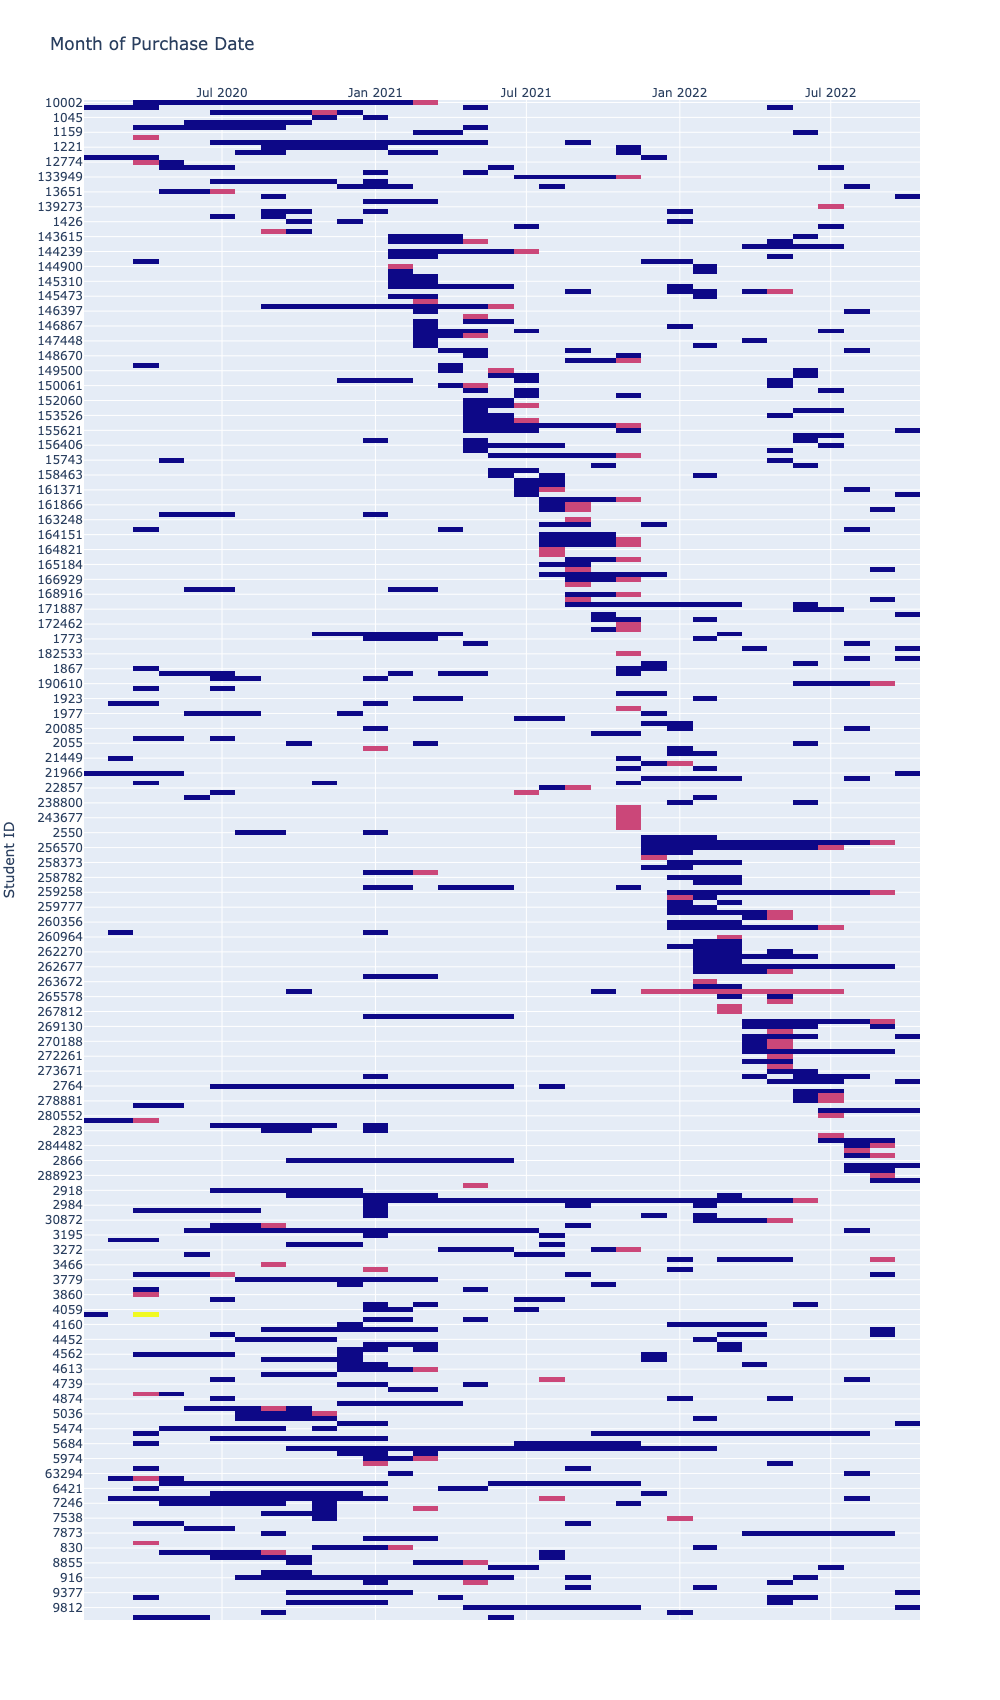

In [25]:
fig.show("png")

## Pre-processing Customer Dataset

### Monthly Data Pre-Processing

For cohort analysis, we need three labels. These are payment period, cohort group and cohort period/index. Now, we need to create the `cohort` and `purchase_month` variables. The first one indicates the **monthly cohort based on the first purchase date** and the second one is the **truncated month of the purchase date**.

First we need to make a `purchase_month` column.

In [26]:
# code here
cust_month['purchase_month'] = cust_month['purchase date'].dt.to_period('M')

In [27]:
# inspection
cust_month.head(2)

,Table Names,purchase_id,subscription_id,purchase date,received_date,price,payment_provider,subscription_type,student_id,last_login,registration_date,student_country,student_level,student_coins,purchase_month
0,ca-user cohort monthlyv.csv,7025,3192.00,2021-01-28,2021-01-29 02:12:20,43.30,1,0,10,2023-01-03 07:28:51,2020-12-11 13:16:07,BG,10,35,2021-01
1,ca-user cohort monthlyv.csv,7731,1112.00,2021-02-27,2021-02-27 11:39:24,47.12,1,0,13,2021-03-08 20:02:52,2020-08-13 00:00:00,NaN,1,3,2021-02


Second, we need to make a future engineering for the `cohort` column.

In [28]:
cust_month['cohort'] = cust_month.groupby('student_id')['purchase date'].transform('min').dt.to_period('M')

Then, we aggregate the data per `cohort` and `purchase_month` and count the number of unique customers in each group.

In [29]:
df_cohort = cust_month.groupby(['cohort', 'purchase_month']).agg(n_customers=('student_id', 'nunique')).reset_index(drop=False)
df_cohort.head()

,cohort,purchase_month,n_customers
0,2020-01,2020-01,8
1,2020-01,2020-02,5
2,2020-01,2020-03,4
3,2020-01,2020-04,3
4,2020-01,2020-05,1


Then, we calculate the `period_number` by subtracting from `purchase_month` as a group of month that customer purchasing a product and `cohort` as a group of month that customer first doing subscription


In [30]:
from operator import attrgetter
df_cohort['period_number'] = (df_cohort.purchase_month - df_cohort.cohort).apply(attrgetter('n'))

In [31]:
df_cohort.head()

,cohort,purchase_month,n_customers,period_number
0,2020-01,2020-01,8,0
1,2020-01,2020-02,5,1
2,2020-01,2020-03,4,2
3,2020-01,2020-04,3,3
4,2020-01,2020-05,1,4


Then, we aggregate the data per `cohort` and `purchase_month` and count the number of unique customers in each group.

In [32]:
cohort_pivot = df_cohort.pivot_table(index='cohort', 
                      columns='period_number', 
                      values='n_customers')
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
cohort,,,,,,,,,,,,,,,,,,,,,
2020-01,8.00,5.00,4.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02,53.00,38.00,28.00,18.00,12.00,10.00,10.00,9.00,5.00,4.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
2020-03,47.00,28.00,15.00,10.00,8.00,5.00,5.00,3.00,3.00,3.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04,149.00,94.00,55.00,38.00,30.00,21.00,17.00,13.00,10.00,10.00,...,3.00,2.00,2.00,2.00,2.00,1.00,1.00,1.00,NaN,NaN
2020-05,114.00,84.00,56.00,36.00,26.00,19.00,16.00,12.00,12.00,12.00,...,3.00,3.00,3.00,3.00,3.00,3.00,3.00,NaN,NaN,NaN
2020-06,115.00,89.00,61.00,43.00,32.00,21.00,20.00,24.00,18.00,14.00,...,3.00,3.00,3.00,3.00,2.00,1.00,NaN,NaN,NaN,NaN
2020-07,97.00,64.00,42.00,34.00,26.00,18.00,12.00,10.00,6.00,6.00,...,2.00,2.00,2.00,2.00,2.00,NaN,NaN,NaN,NaN,NaN
2020-08,105.00,73.00,47.00,34.00,24.00,21.00,14.00,11.00,9.00,7.00,...,1.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN
2020-09,113.00,74.00,44.00,34.00,31.00,20.00,17.00,14.00,13.00,12.00,...,4.00,2.00,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Actually, cohort_pivot shows us what we want to see. But we need to convert the table to see more clearly. The `cohort_size` shows the number of customers in a group/cohort. 

In [33]:
cohort_size = cohort_pivot.iloc[:, 0]
cohort_size.head()

cohort
2020-01     8.00
2020-02    53.00
2020-03    47.00
2020-04   149.00
2020-05   114.00
Freq: M, Name: 0, dtype: float64

Insights:
- The number of customers in the January 2020 cohort was 8 customers
- A total of 149 people are in the 2020-04 cohort

In [34]:
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

In [35]:
retention_matrix

period_number,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
cohort,,,,,,,,,,,,,,,,,,,,,
2020-01,1.00,0.62,0.50,0.38,0.12,0.12,0.12,0.12,0.12,0.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02,1.00,0.72,0.53,0.34,0.23,0.19,0.19,0.17,0.09,0.08,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
2020-03,1.00,0.60,0.32,0.21,0.17,0.11,0.11,0.06,0.06,0.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04,1.00,0.63,0.37,0.26,0.20,0.14,0.11,0.09,0.07,0.07,...,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01,NaN,NaN
2020-05,1.00,0.74,0.49,0.32,0.23,0.17,0.14,0.11,0.11,0.11,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,NaN,NaN,NaN
2020-06,1.00,0.77,0.53,0.37,0.28,0.18,0.17,0.21,0.16,0.12,...,0.03,0.03,0.03,0.03,0.02,0.01,NaN,NaN,NaN,NaN
2020-07,1.00,0.66,0.43,0.35,0.27,0.19,0.12,0.10,0.06,0.06,...,0.02,0.02,0.02,0.02,0.02,NaN,NaN,NaN,NaN,NaN
2020-08,1.00,0.70,0.45,0.32,0.23,0.20,0.13,0.10,0.09,0.07,...,0.01,0.01,0.01,0.01,NaN,NaN,NaN,NaN,NaN,NaN
2020-09,1.00,0.65,0.39,0.30,0.27,0.18,0.15,0.12,0.12,0.11,...,0.04,0.02,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### ⌛ Cohort: Time from First Regist to First Purchase

Group customers based on the first time they registered an account on the platform (`registration date`), group them by month and then calculate how long it will take until they make their first purchase (`purchase date`).

The calculation of how long it takes to make the first purchase is seen in monthly units

In [36]:
# code here
mixed_cust['registration_month'] = mixed_cust['registration_date'].dt.to_period('M')
mixed_cust['cohort'] = mixed_cust.groupby('student_id')['purchase date'].transform('min').dt.to_period('M')

Previously we created a `cohort` column which contained the group of customers who first made `purchase_date`. Then, we aggregate the data per `cohort` and `registration_month` and count the number of unique customers in each group.

In [37]:
df_regist_purch = mixed_cust.groupby(['registration_month', 'cohort']).agg(n_customers=('student_id', 'nunique')).reset_index(drop=False)
df_regist_purch.head()

,registration_month,cohort,n_customers
0,2019-10,2020-02,4
1,2019-10,2020-03,2
2,2019-10,2020-04,9
3,2019-10,2020-05,4
4,2019-10,2020-06,7


Then, we calculate the `time_to_purchase` by subtracting from `registration_month` as a group of month that customer registrating account and `cohort` as a group of month that customer first doing subscription


In [38]:
from operator import attrgetter
df_regist_purch['time_to_purchase'] = (df_regist_purch.cohort-df_regist_purch.registration_month).apply(attrgetter('n'))
df_regist_purch.head()

,registration_month,cohort,n_customers,time_to_purchase
0,2019-10,2020-02,4,4
1,2019-10,2020-03,2,5
2,2019-10,2020-04,9,6
3,2019-10,2020-05,4,7
4,2019-10,2020-06,7,8


Then, we aggregate the data per `registration_month` and `cohort` and count the number of unique customers in each group.

In [39]:
cohort_regist_purch = df_regist_purch.pivot_table(index='registration_month', 
                      columns='time_to_purchase', 
                      values='n_customers')
cohort_regist_purch

time_to_purchase,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,33,36
registration_month,,,,,,,,,,,,,,,,,,,,,
2019-10,NaN,NaN,NaN,NaN,4.00,2.00,9.00,4.00,7.00,7.00,...,NaN,2.00,2.00,1.00,1.00,1.00,NaN,2.00,1.00,2.00
2019-11,NaN,NaN,2.00,2.00,NaN,13.00,NaN,1.00,2.00,2.00,...,NaN,NaN,2.00,NaN,1.00,NaN,NaN,NaN,NaN,NaN
2019-12,NaN,1.00,2.00,2.00,6.00,NaN,1.00,1.00,1.00,2.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01,8.00,6.00,NaN,2.00,1.00,NaN,NaN,1.00,NaN,NaN,...,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN
2020-02,82.00,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03,89.00,83.00,2.00,7.00,6.00,NaN,1.00,2.00,4.00,1.00,...,NaN,1.00,2.00,1.00,2.00,1.00,NaN,NaN,NaN,NaN
2020-04,1064.00,38.00,15.00,40.00,4.00,33.00,8.00,23.00,17.00,25.00,...,3.00,6.00,4.00,9.00,NaN,8.00,2.00,NaN,NaN,NaN
2020-05,165.00,13.00,7.00,3.00,2.00,1.00,2.00,3.00,5.00,2.00,...,NaN,1.00,NaN,1.00,NaN,1.00,NaN,NaN,NaN,NaN
2020-06,178.00,15.00,1.00,2.00,1.00,2.00,NaN,5.00,NaN,NaN,...,NaN,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Annual Data Pre Processing

In [40]:
# code here
cust_annual['purchase_year'] = cust_annual['purchase date'].dt.to_period('Y')

In [41]:
# inspection
cust_annual.head(2)

,Table Names,purchase_id,subscription_id,purchase date,received_date,price,payment_provider,subscription_type,student_id,last_login,registration_date,student_country,student_level,student_coins,purchase_year
0,ca-user cohort annual.csv,4851,0.00,2020-11-27,2021-01-28 23:41:53,139.37,1,1,520,2021-11-27 10:22:07,2020-11-27,RS,4,31,2020
1,ca-user cohort annual.csv,3900,0.00,2020-09-30,2021-01-28 23:41:53,173.79,1,1,523,2022-05-14 14:35:11,2020-09-30,IN,7,232,2020


Second, we need to make a future engineering for the `cohort` column.

In [42]:
cust_annual['cohort'] = cust_annual.groupby('student_id')['purchase date'].transform('min').dt.to_period('Y')

Then, we aggregate the data per `cohort` and `purchase_year` and count the number of unique customers in each group.

In [43]:
df_cohort_year = cust_annual.groupby(['cohort', 'purchase_year']).agg(n_customers=('student_id', 'nunique')).reset_index(drop=False)
df_cohort_year.head()

,cohort,purchase_year,n_customers
0,2020,2020,2571
1,2020,2021,839
2,2020,2022,425
3,2021,2021,2699
4,2021,2022,569


Then, we calculate the `period_number` by subtracting from `purchase_year` as a group of month that customer purchasing a product and `cohort` as a group of month that customer first doing subscription.


In [44]:
from operator import attrgetter
df_cohort_year['period_number'] = (df_cohort_year.purchase_year - df_cohort_year.cohort).apply(attrgetter('n'))

In [45]:
df_cohort_year.head()

,cohort,purchase_year,n_customers,period_number
0,2020,2020,2571,0
1,2020,2021,839,1
2,2020,2022,425,2
3,2021,2021,2699,0
4,2021,2022,569,1


Then, we aggregate the data per `cohort` and `purchase_year` and count the number of unique customers in each group.

In [46]:
cohort_pivot_year = df_cohort_year.pivot_table(index='cohort', 
                                               columns='period_number', 
                                               values='n_customers')
cohort_pivot_year

period_number,0,1,2
cohort,,,
2020,2571.00,839.00,425.00
2021,2699.00,569.00,NaN
2022,1930.00,NaN,NaN


Actually, cohort_pivot shows us what we want to see. But we need to convert the table to see more clearly. The `cohort_size` shows the number of customers in a group/cohort. 

In [47]:
cohort_size = cohort_pivot_year.iloc[:, 0]
cohort_size.head()

cohort
2020   2571.00
2021   2699.00
2022   1930.00
Freq: A-DEC, Name: 0, dtype: float64

In [48]:
retention_matrix_year = cohort_pivot_year.divide(cohort_size, axis=0)
retention_matrix_year

period_number,0,1,2
cohort,,,
2020,1.00,0.33,0.17
2021,1.00,0.21,NaN
2022,1.00,NaN,NaN


## Visualization

### Cohort Visualization for Monthly Subscriber

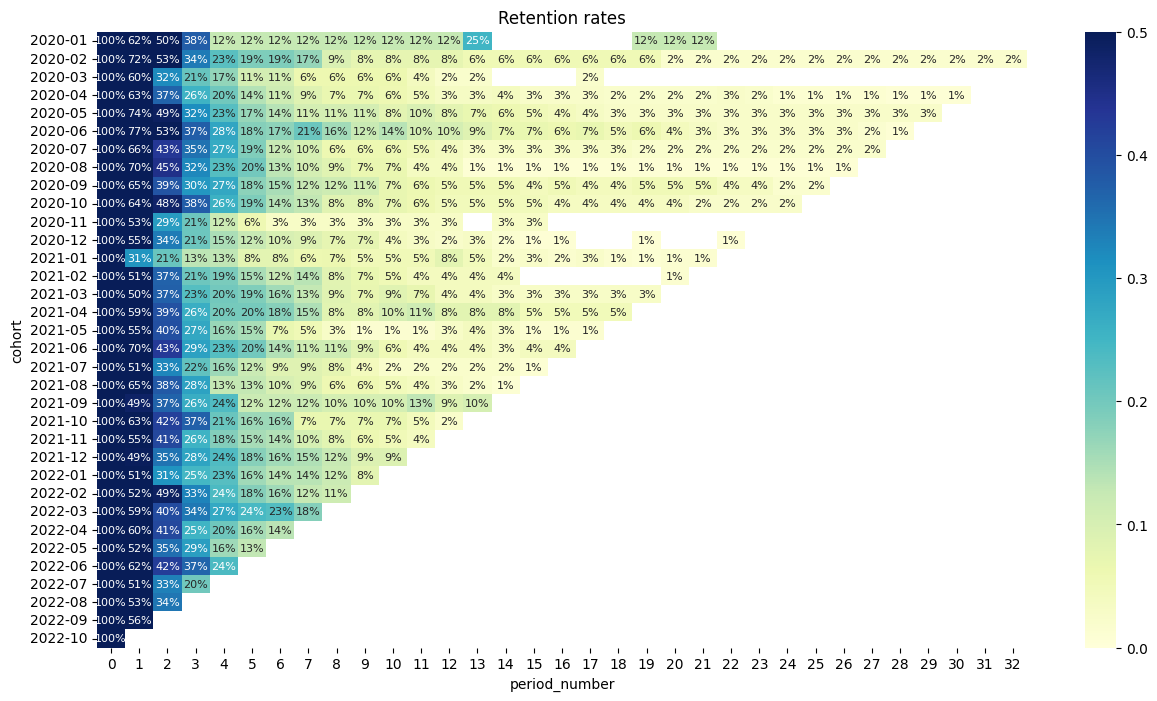

In [49]:
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention_matrix, 
            annot = True,
            annot_kws={"fontsize":8}, 
            fmt = '.0%',
            vmin = 0.0,
            vmax = 0.5,
            cmap="YlGnBu")
plt.show()

### Cohort Visualization for Annual Subscriber

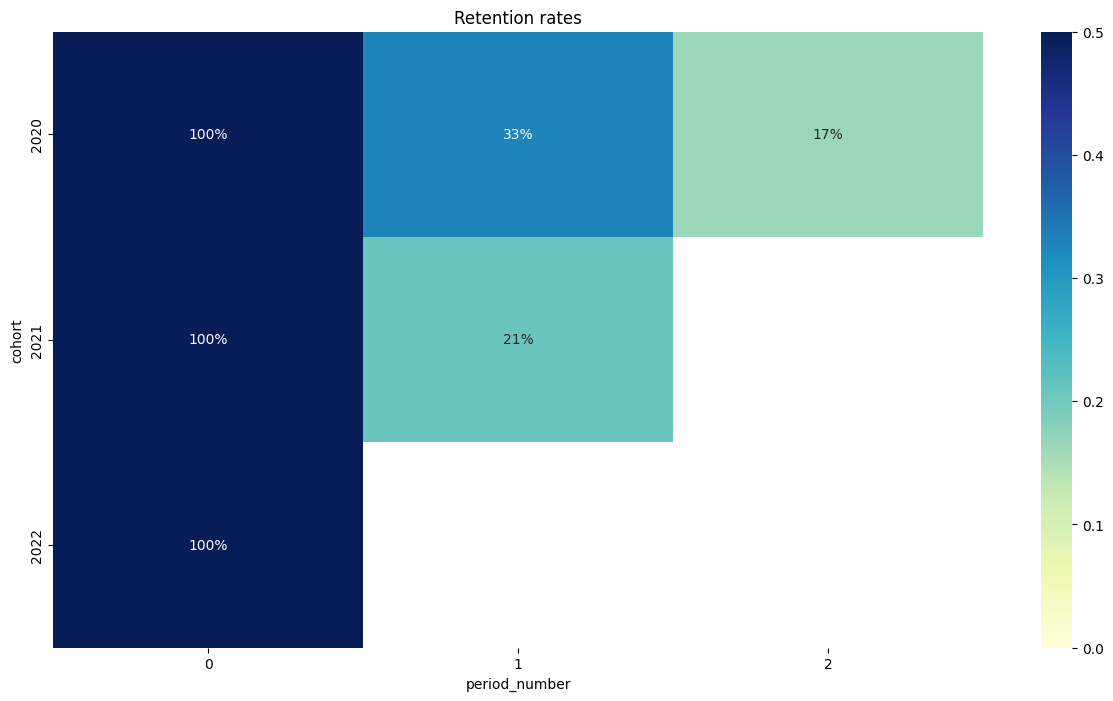

In [50]:
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention_matrix_year,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap="YlGnBu")
plt.show()

### Cohort Visualization From Regist to First Purchase

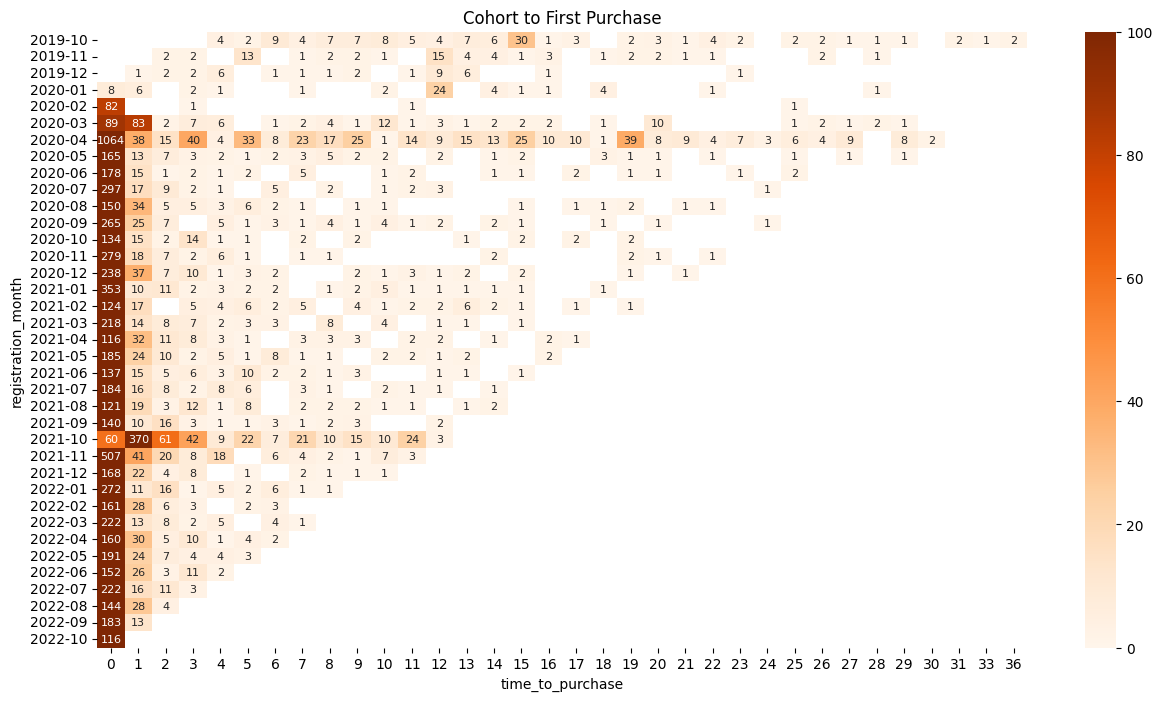

In [51]:
plt.figure(figsize=(15, 8))
plt.title('Cohort to First Purchase')
sns.heatmap(data = cohort_regist_purch,
            annot = True,
            annot_kws={"fontsize":8}, 
            vmax = 100, 
            vmin = 0, 
            cmap="Oranges",
            fmt='g')
plt.show()

**Results**:

- It turns out that many customers who registered in October 2019 did not immediately purchase any learning videos. A total of 30 new customers purchased after 15 months

---

# Conjoint Analysis <a id="4" ></a>

Conjoint analysis is a technique that extends regression analysis to understand customer preferences, pricing for your product and also roughly size the market for the product

In [52]:
# customer all dataset
mixed_cust.head()

,Table Names,purchase_id,subscription_id,purchase date,received_date,price,payment_provider,subscription_type,student_id,last_login,registration_date,student_country,student_level,student_coins,registration_month,cohort
0,ca-user cohort monthlyv.csv,7025,3192.00,2021-01-28,2021-01-29 02:12:20,43.30,1,0,10,2023-01-03 07:28:51,2020-12-11 13:16:07,BG,10,35,2020-12,2021-01
1,ca-user cohort monthlyv.csv,7731,1112.00,2021-02-27,2021-02-27 11:39:24,47.12,1,0,13,2021-03-08 20:02:52,2020-08-13 00:00:00,NaN,1,3,2020-08,2020-08
2,ca-user cohort monthlyv.csv,6221,0.00,2021-01-27,2021-01-28 23:41:54,46.24,1,0,13,2021-03-08 20:02:52,2020-08-13 00:00:00,NaN,1,3,2020-08,2020-08
3,ca-user cohort monthlyv.csv,5505,0.00,2020-12-27,2021-01-28 23:41:54,45.82,1,0,13,2021-03-08 20:02:52,2020-08-13 00:00:00,NaN,1,3,2020-08,2020-08
4,ca-user cohort monthlyv.csv,4836,0.00,2020-11-27,2021-01-28 23:41:53,45.14,1,0,13,2021-03-08 20:02:52,2020-08-13 00:00:00,NaN,1,3,2020-08,2020-08


## Pre Processing Data

**Feature Engineering**

- Extracting the month name from the `purchase date` column

In [53]:
mixed_cust['purchase_month_agg'] = mixed_cust['purchase date'].dt.month

**Change Data Types**

In [54]:
mixed_cust.dtypes

Table Names                   object
purchase_id                    int64
subscription_id              float64
purchase date         datetime64[ns]
received_date         datetime64[ns]
price                        float64
payment_provider            category
subscription_type             object
student_id                    object
last_login            datetime64[ns]
registration_date     datetime64[ns]
student_country               object
student_level                  int64
student_coins                  int64
registration_month         period[M]
cohort                     period[M]
purchase_month_agg             int32
dtype: object

We need to change the `subscription_type` and `purchase_month_agg` columns to category type so that further analysis can be carried out

In [55]:
# code here
mixed_cust[['subscription_type', 'purchase_month_agg']] = mixed_cust[['subscription_type', 'purchase_month_agg']].astype('category')

**Dummy Encoding**

The variables we have are variables with the category data type, therefore we need to create a dummy variable first. For the Linear Regression algorithm, because there is still an assumption of multicollinearity, dummy variables will be used.

Let's carry out this method by utilizing the following function `pd.get_dummies()` and filling it with several parameters, including:

- `data`: data you want to convert to numeric
- `columns`: list of columns for dummy variable encoding
- `drop_first`: whether to drop the first column. Default False. However, we will set it as True so that the dummies result column is not redundant
- `dtype` = enter the data type you want to fill in

In [56]:
# code here
cust_all_enc = pd.get_dummies(data = mixed_cust, 
                             columns = ["payment_provider", "subscription_type","purchase_month_agg"],
                             drop_first = True,
                             dtype = int)

Next, check the column that has been formed from the encoding results.

In [57]:
cust_all_enc.columns

Index(['Table Names', 'purchase_id', 'subscription_id', 'purchase date',
       'received_date', 'price', 'student_id', 'last_login',
       'registration_date', 'student_country', 'student_level',
       'student_coins', 'registration_month', 'cohort', 'payment_provider_2',
       'payment_provider_3', 'subscription_type_1', 'purchase_month_agg_2',
       'purchase_month_agg_3', 'purchase_month_agg_4', 'purchase_month_agg_5',
       'purchase_month_agg_6', 'purchase_month_agg_7', 'purchase_month_agg_8',
       'purchase_month_agg_9', 'purchase_month_agg_10',
       'purchase_month_agg_11', 'purchase_month_agg_12'],
      dtype='object')

### Conjoint - Calculate part-worths from regression analysis

The objective of the conjoint analysis is to find the combination of attributes or features that the customer most values and the price point for the optimal feature bundle. The first step is to calculate the part-worth utility for the attributes.

The dataset already is one-hot encoded with 1 or 0 for each of the attribute levels. We fit a regression model on these attributes

In [58]:
X = cust_all_enc[['payment_provider_2', 'payment_provider_3',
       'subscription_type_1', 'purchase_month_agg_2', 'purchase_month_agg_3',
       'purchase_month_agg_4', 'purchase_month_agg_5', 'purchase_month_agg_6',
       'purchase_month_agg_7', 'purchase_month_agg_8', 'purchase_month_agg_9',
       'purchase_month_agg_10', 'purchase_month_agg_11',
       'purchase_month_agg_12']]

Y = cust_all_enc.price
LR = sm.OLS(Y, X).fit()
LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                          2.004e+04
Date:                Wed, 08 May 2024   Prob (F-statistic):                        0.00
Time:                        10:43:29   Log-Likelihood:                         -89037.
No. Observations:               18387   AIC:                                  1.781e+05
Df Residuals:                   18373   BIC:                                  1.782e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
payment_provider_2       11.1399      1.367      8.150      0.000       8.461      13.819
payment_provider_3       -7.8256      0.610    -12.823      0.000      -9.022      -6.629
subscription_type_1     141.4631      0.456    310.196      0.000     140.569     142.357
purchase_month_agg_2     40.8426      0.990     41.248      0.000      38.902      42.783
purchase_month_agg_3     34.7558      0.878     39.592      0.000      33.035      36.476
purchase_month_agg_4     26.9679      0.687     39.259      0.000      25.621      28.314
purchase_month_agg_5     35.6382      0.839     42.491      0.000      33.994      37.282
purchase_month_agg_6     39.0376      0.864     45.179      0.000      37.344      40.731
purchase_month_agg_7     35.6262      0.763     46.675      0.000      34.130      37.122
purchase_month_agg_8     38.7493      0.870     44.541      0.000      37.044      40.455
purchase_month_agg_9     35.5089      0.790     44.954      0.000      33.961      37.057
purchase_month_agg_10    37.6527      0.928     40.566      0.000      35.833      39.472
purchase_month_agg_11     6.4944      0.769      8.450      0.000       4.988       8.001
purchase_month_agg_12    29.6012      0.965     30.674      0.000      27.710      31.493
==============================================================================
Omnibus:                    11115.016   Durbin-Watson:                   1.652
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           242839.641
Skew:                           2.506   Prob(JB):                         0.00
Kurtosis:                      20.083   Cond. No.                         4.62
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Part worth utility for each of the attribute levels are just the regression coefficients obtained from regression model.

In [59]:
df_res = pd.DataFrame({
    'param_name': LR.params.keys()
    , 'param_w': LR.params.values
    , 'pval': LR.pvalues
})
# adding field for absolute of parameters
df_res['abs_param_w'] = np.abs(df_res['param_w'])
# marking field is significant under 95% confidence interval
df_res['is_sig_95'] = (df_res['pval'] < 0.05)
# constructing color naming for each param
df_res['c'] = ['blue' if x else 'red' for x in df_res['param_w']> 0]

# make it sorted by abs of parameter value
df_res = df_res.sort_values(by='abs_param_w', ascending=True)

In [60]:
df_res

,param_name,param_w,pval,abs_param_w,is_sig_95,c
purchase_month_agg_11,purchase_month_agg_11,6.49,0.00,6.49,True,blue
payment_provider_3,payment_provider_3,-7.83,0.00,7.83,True,red
payment_provider_2,payment_provider_2,11.14,0.00,11.14,True,blue
purchase_month_agg_4,purchase_month_agg_4,26.97,0.00,26.97,True,blue
purchase_month_agg_12,purchase_month_agg_12,29.60,0.00,29.60,True,blue
purchase_month_agg_3,purchase_month_agg_3,34.76,0.00,34.76,True,blue
purchase_month_agg_9,purchase_month_agg_9,35.51,0.00,35.51,True,blue
purchase_month_agg_7,purchase_month_agg_7,35.63,0.00,35.63,True,blue
purchase_month_agg_5,purchase_month_agg_5,35.64,0.00,35.64,True,blue
purchase_month_agg_10,purchase_month_agg_10,37.65,0.00,37.65,True,blue


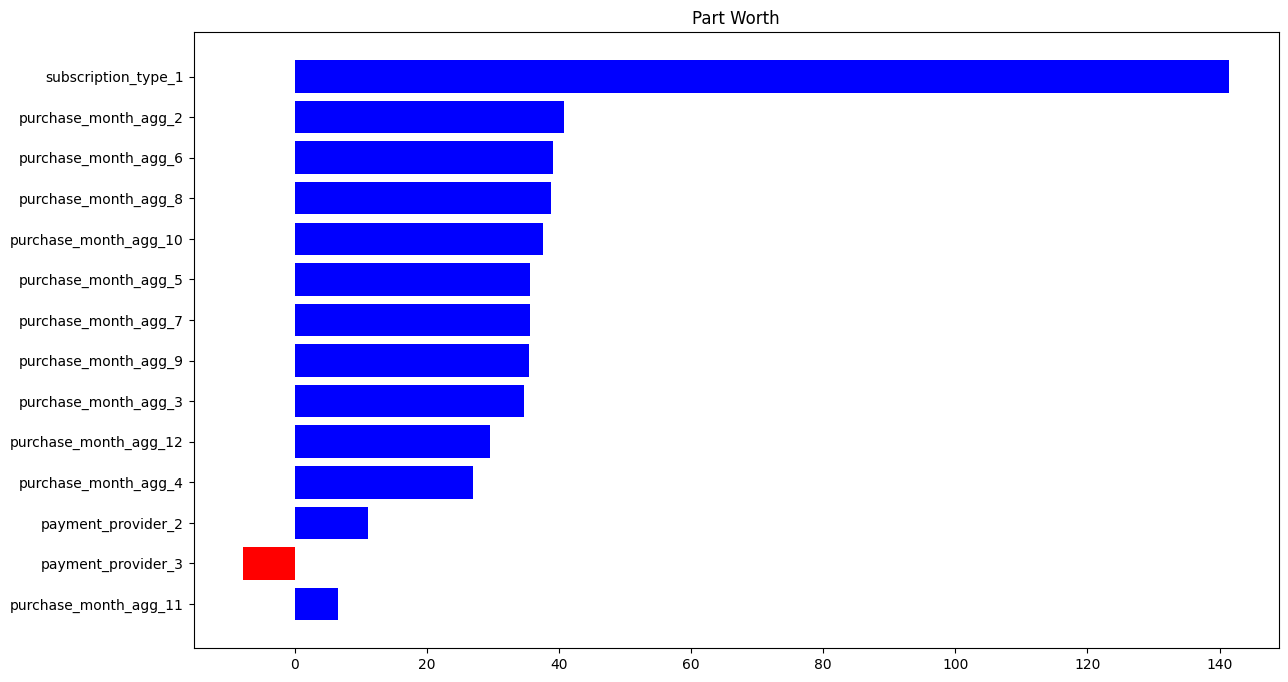

In [61]:
# visualization
f, ax = plt.subplots(figsize=(14, 8))
plt.title('Part Worth')
pwu = df_res['param_w']
xbar = np.arange(len(pwu))
plt.barh(xbar, pwu, color=df_res['c'])
plt.yticks(xbar, labels=df_res['param_name'])
plt.show()

**Results**
- The `subscription_type_1` or annual subscription variable is the variable with the part value that contributes the most to revenue
- The variable `payment_provider_3` has a negative coefficient. The interpretation is that when compared to `payment_provider_1` (credit card), `payment_provider_3` (paypal) reduces revenue

### Estimate Utility Scores and Simulate Market Scenarios

Estimate Utility Scores:
* Train a model (like linear regression) on your customer choice or rank data.
* The model coefficients represent the part-worth utilities for each feature level.

In [62]:
cust_all_enc_ms = cust_all_enc.copy()

# drop Y
cust_all_enc_ms = cust_all_enc_ms.drop(["price"],axis=1)

# select X
X = cust_all_enc_ms[['payment_provider_2', 'payment_provider_3',
       'subscription_type_1', 'purchase_month_agg_2', 'purchase_month_agg_3',
       'purchase_month_agg_4', 'purchase_month_agg_5', 'purchase_month_agg_6',
       'purchase_month_agg_7', 'purchase_month_agg_8', 'purchase_month_agg_9',
       'purchase_month_agg_10', 'purchase_month_agg_11',
       'purchase_month_agg_12']]

# predict utility scores
predictUtil = LR.predict(X)
cust_all_enc_ms["predictedUtility"] = predictUtil

In [63]:
# making a market share combination for each feature
utility_values = list(cust_all_enc_ms["predictedUtility"].values)
total_utility=0
for val in utility_values:
    total_utility = total_utility + np.exp(val)
market_shares =[]
for val in utility_values:
    probability = np.exp(val)/total_utility
    market_shares.append(probability*100)

In [64]:
# implementing
cust_all_enc_ms["market_share"] = market_shares
combination = cust_all_enc_ms[['payment_provider_2', 'payment_provider_3',
       'subscription_type_1', 'purchase_month_agg_2', 'purchase_month_agg_3',
       'purchase_month_agg_4', 'purchase_month_agg_5', 'purchase_month_agg_6',
       'purchase_month_agg_7', 'purchase_month_agg_8', 'purchase_month_agg_9',
       'purchase_month_agg_10', 'purchase_month_agg_11',
       'purchase_month_agg_12', 'predictedUtility','market_share']].drop_duplicates()

combination

,payment_provider_2,payment_provider_3,subscription_type_1,purchase_month_agg_2,purchase_month_agg_3,purchase_month_agg_4,purchase_month_agg_5,purchase_month_agg_6,purchase_month_agg_7,purchase_month_agg_8,purchase_month_agg_9,purchase_month_agg_10,purchase_month_agg_11,purchase_month_agg_12,predictedUtility,market_share
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,40.84,0.00
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,29.60,0.00
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6.49,0.00
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,37.65,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17075,0,1,1,0,0,0,0,0,1,0,0,0,0,0,169.26,0.00
17077,0,1,1,0,0,0,0,0,0,0,1,0,0,0,169.15,0.00
17080,0,1,1,0,0,0,0,1,0,0,0,0,0,0,172.68,0.00
17093,0,1,1,0,0,0,0,0,0,0,0,1,0,0,171.29,0.00


More Analysis:

- For Annual Subscription
- For Monthly Subscription

In [65]:
# annual subscription
combination[combination['subscription_type_1'] == 1].sort_values(by = 'predictedUtility', ascending = False)

,payment_provider_2,payment_provider_3,subscription_type_1,purchase_month_agg_2,purchase_month_agg_3,purchase_month_agg_4,purchase_month_agg_5,purchase_month_agg_6,purchase_month_agg_7,purchase_month_agg_8,purchase_month_agg_9,purchase_month_agg_10,purchase_month_agg_11,purchase_month_agg_12,predictedUtility,market_share
10022,1,0,1,1,0,0,0,0,0,0,0,0,0,0,193.45,5.70
10040,1,0,1,0,0,0,0,1,0,0,0,0,0,0,191.64,0.94
9345,1,0,1,0,0,0,0,0,0,1,0,0,0,0,191.35,0.70
9390,1,0,1,0,0,0,0,0,0,0,0,1,0,0,190.26,0.23
9619,1,0,1,0,0,0,1,0,0,0,0,0,0,0,188.24,0.03
10672,1,0,1,0,0,0,0,0,1,0,0,0,0,0,188.23,0.03
9984,1,0,1,0,0,0,0,0,0,0,1,0,0,0,188.11,0.03
11041,1,0,1,0,1,0,0,0,0,0,0,0,0,0,187.36,0.01
9320,0,0,1,1,0,0,0,0,0,0,0,0,0,0,182.31,0.00
9947,1,0,1,0,0,0,0,0,0,0,0,0,0,1,182.20,0.00


**Insight**:

From the table we got for part-worthy utility results for monthly subscription, it is possible to arrive at the optimal feature bundle and optimal price point

- From the part-worth utility values, we can say `payment_provider_2` and `purchase_month_agg_2` is the optimal feature bundle. 
- Total predicted utility from the regression model for the feature combination `payment_provider_2` and `purchase_month_agg_2` is 193.445

In [66]:
# annual subscription
combination[combination['subscription_type_1'] == 0].sort_values(by = 'predictedUtility', ascending = False)

,payment_provider_2,payment_provider_3,subscription_type_1,purchase_month_agg_2,purchase_month_agg_3,purchase_month_agg_4,purchase_month_agg_5,purchase_month_agg_6,purchase_month_agg_7,purchase_month_agg_8,purchase_month_agg_9,purchase_month_agg_10,purchase_month_agg_11,purchase_month_agg_12,predictedUtility,market_share
198,1,0,0,1,0,0,0,0,0,0,0,0,0,0,51.98,0.00
1450,1,0,0,0,0,0,0,1,0,0,0,0,0,0,50.18,0.00
4767,1,0,0,0,0,0,0,0,0,1,0,0,0,0,49.89,0.00
5000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,48.79,0.00
175,1,0,0,0,0,0,1,0,0,0,0,0,0,0,46.78,0.00
274,1,0,0,0,0,0,0,0,1,0,0,0,0,0,46.77,0.00
4828,1,0,0,0,0,0,0,0,0,0,1,0,0,0,46.65,0.00
117,1,0,0,0,1,0,0,0,0,0,0,0,0,0,45.90,0.00
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,40.84,0.00
1217,1,0,0,0,0,0,0,0,0,0,0,0,0,1,40.74,0.00


**Insight**:

From the table we got for part-worthy utility results for annual subscription, it is possible to arrive at the optimal feature bundle and optimal price point.

- From the part-worth utility values , we can say `payment_provider_2` and `purchase_month_agg_2` is the optimal feature bundle. 
- Total predicted utility from the regression model for the feature combination `payment_provider_2` and `purchase_month_agg_2` is 51.98

We see how conjoint analysis helps break the overall value perceived by the customer into individual part-worth utility values. From these part-worth utility values, we can prioritise or combine features to arrive at optimal product and price